In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from tqdm import tqdm
import random
import pickle as pkl

In [62]:
path = '/Users/somayeh/Research_Data/FULL_ELASTICC_TRAIN/CSV/'

In [63]:
colors ={'u':"#00c2f2",
         'g':"#59b359",
         'r':"#e51f00",
         'i':"#502db3",
         'z':"#ffaa00",
         'y':"#f2b6de"
        }

classes = ['Cepheid',
           'AGN',
           'RRL',
           'EB',
           'Mdwarf',
           'uLens-Single',
           'uLens-Binary',
           'CART',
           'SNIa',
           'SNIb',
           'SNIc',
           'd-Sct']
           
           

In [73]:
n_lc_per_class = 5000
dict_all = {}
for c in tqdm(classes):
    print(c)
    dict_all[c] = {}
    path_class = path+c+'/'
    list_lc = glob.glob(path_class+'*')
    if len(list_lc)<n_lc_per_class:
        n_lc_per_class = len(list_lc)
        print(n_lc_per_class)
    lcs_path = random.sample(list_lc, n_lc_per_class)
    for i, lc_path in enumerate(lcs_path):
        df = pd.read_csv(lc_path)
        dict_all[c][i] = df.values[:,1:]
    
    


  0%|                                                                         | 0/12 [00:00<?, ?it/s]

Cepheid


  8%|█████▍                                                           | 1/12 [00:04<00:46,  4.25s/it]

AGN


 17%|██████████▊                                                      | 2/12 [00:09<00:46,  4.66s/it]

RRL


 25%|████████████████▎                                                | 3/12 [00:13<00:39,  4.33s/it]

EB


 33%|█████████████████████▋                                           | 4/12 [00:18<00:36,  4.62s/it]

Mdwarf
2625


 42%|███████████████████████████                                      | 5/12 [00:19<00:24,  3.57s/it]

uLens-Single


 50%|████████████████████████████████▌                                | 6/12 [00:22<00:18,  3.14s/it]

uLens-Binary


 58%|█████████████████████████████████████▉                           | 7/12 [00:24<00:13,  2.76s/it]

CART


 67%|███████████████████████████████████████████▎                     | 8/12 [00:26<00:10,  2.59s/it]

SNIa


 75%|████████████████████████████████████████████████▊                | 9/12 [00:29<00:08,  2.86s/it]

SNIb


 83%|█████████████████████████████████████████████████████▎          | 10/12 [00:32<00:05,  2.92s/it]

SNIc


 92%|██████████████████████████████████████████████████████████▋     | 11/12 [00:35<00:02,  2.93s/it]

d-Sct


100%|████████████████████████████████████████████████████████████████| 12/12 [00:38<00:00,  3.19s/it]


57625

In [74]:
pkl.dump(dict_all, open('all_data.pkl', 'wb'))

In [81]:
len(df[df.b=='i '])

28

Text(0, 0.5, 'Flux')

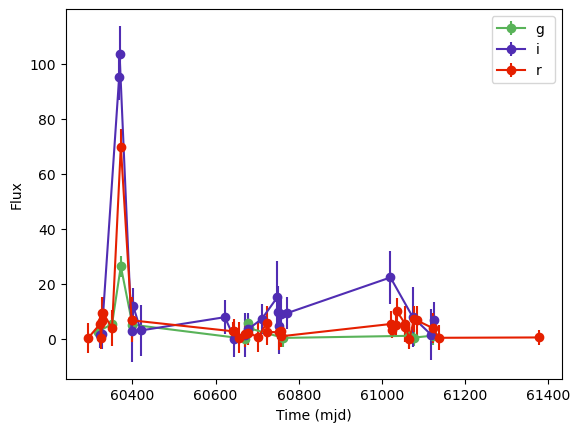

In [82]:
# Read an example light curve

path_example = glob.glob(path+'uLens-Binary/*')[2]

df = pd.read_csv(path_example, encoding = "ISO-8859-1")
bands = np.unique(df['b'].values)

for band in bands:    

    plt.errorbar(df.t[df.b==band], 
                 df.f[df.b==band], 
                 yerr = df.ferr[df.b==band],
                 fmt = 'o-',
                 color = colors[band.strip()],
                label = band)
    
plt.legend()
plt.xlabel('Time (mjd)')
plt.ylabel('Flux')

In [86]:
df[['t', 'f', 'ferr']][df.b=='g '].values[:5]

array([[6.03171239e+04, 2.72302440e+00, 3.39478560e+00],
       [6.03510616e+04, 5.44229270e+00, 3.50173020e+00],
       [6.03721486e+04, 2.64592530e+01, 3.85354400e+00],
       [6.04000424e+04, 5.22058300e+00, 3.61224170e+00],
       [6.06711857e+04, 1.02467630e-01, 2.81300140e+00]])